<a href="https://colab.research.google.com/github/Teivak/FaceRecognitionProject/blob/main/1_HW_FaceAlignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Alignment

## Выбор датасета

В этом проекте мы будем работать с датасетом [CelebA - Original Wild Images](https://www.kaggle.com/datasets/kevinpatel04/celeba-original-wild-images). Обычно, когда говорят про CelebA имеют ввиду его кропнутую и выровненную версию, но мы будем работать с сырой.

![CelebA](https://figures.semanticscholar.org/7df4f96138a4e23492ea96cf921794fc5287ba72/6-Figure4-1.png)

Оригинальная версия датасета весит очень много: ~20 гб. Все картинки нам не будут нужны, достаточно будет ограничиться 10.000+.

Вашим первым заданием будет подготовить себе рабочий датасет. Он будет использован и в следующих заданиях, поэтому подойдите к этому очень ответственно:

- Скачайте себе датасет CelebA In a Wild любым удобным способом;
- Подумайте над тем, по каким критериям лучше всего выбирать картинки. Используйте файл с атрибутами. Обоснуйте свой выбор текстом. В случае, если обоснования выбора датасета не будет, то баллы могут быть снижены. Отнеситесь к этому серьезно: хорошая подготовка данных очень важна;
- Отберите 10.000+ изображений. Можно и больше при желании;
- При помощи атрибутов bbox'а, обрежьте картинки, чтобы на них остались только лица. При желании можно делать дополнительный кроп, так как не везде разметка идеальна, но не нужно сидеть над каждой картинкой отдельно - потратите слишком много времени;
- Сохраните отдельный csv-файл с оригинальными названиями изображений, которые были отобраны в ваш датасет. В дальнейшем он в том числе понадобится для сдачи проекта.

Несколько практических советов:
- Если решили делать дополнительный кроп изображений самостоятельно, то имейте ввиду, что ключевые точки лица в атрибутах указаны в начальной системе координат.
- Не работайте с датасетом в колабе. Простейшую работу с файлами удобнее всего делать локально на своем компьютере. Это не требует мощного железа и скачивания библиотек. Если все же пользуетесь колабом, то работайте на CPU, чтобы не лишний раз не тратить токены.
- Если есть возможность, то не удаляйте оригинальный датасет с вашего компьютера на период работы над проектом. Да, это лишняя занятая память, но зато при надобности можно будет быстро что-то изменить.
- Загрузите финальный датасет (10.000+ картинок) себе на Google Disk. Это удобнее, чем каждый раз отдельно загружать его себе в колаб сессию.

In [ ]:
import kagglehub
import os
# Download latest version

path = kagglehub.dataset_download("kevinpatel04/celeba-original-wild-images")

print("Путь как датасету:", path)

Путь как датасету: /home/timof/.cache/kagglehub/datasets/kevinpatel04/celeba-original-wild-images/versions/1


In [ ]:
import pandas as pd

attr_list = pd.read_csv(f'{path}/list_attr_celeba.csv')
bbox_list = pd.read_csv(f'{path}/list_bbox_celeba.csv')

In [ ]:
attr_list.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
merged_df = pd.merge(attr_list, bbox_list, on='image_id')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [ ]:
key_attributes = ['Male', 'Smiling', 'Young', 'Eyeglasses', 'Bald', 'Bags_Under_Eyes', 'Attractive']

# Convert -1/1 to 0/1 for easier interpretation in combinations
for attr in key_attributes:
    merged_df[attr] = merged_df[attr].apply(lambda x: 1 if x == 1 else 0)

# Create a new column for attribute combinations as a string
merged_df['attribute_combination'] = merged_df[key_attributes].astype(str).agg('_'.join, axis=1)

print("Attribute combinations value counts:")
print(merged_df['attribute_combination'].value_counts())

Attribute combinations value counts:
attribute_combination
0_1_1_0_0_0_1    37383
0_0_1_0_0_0_1    31692
1_0_1_0_0_0_0    15190
0_0_1_0_0_0_0    14788
0_1_1_0_0_0_0     8480
                 ...  
0_0_1_1_0_1_1        1
0_0_1_1_0_1_0        1
0_0_1_0_1_0_1        1
1_1_0_1_1_0_1        1
0_1_1_1_1_0_0        1
Name: count, Length: 97, dtype: int64


In [ ]:
selected_images_df = pd.DataFrame()
target_total_images = 25000

# Determine the number of unique attribute combinations
num_combinations = merged_df['attribute_combination'].nunique()

# Calculate a base number of samples per combination to aim for the target total
# This simple division works as a starting point; actual sample size will vary if a group is smaller
base_samples_per_combination = target_total_images // num_combinations

for combination, group in merged_df.groupby('attribute_combination'):
    # Sample either the base number or all available images if the group is smaller
    n_samples = min(len(group), base_samples_per_combination)
    selected_images_df = pd.concat([selected_images_df, group.sample(n=n_samples, random_state=42)])


print(f"Всего изображений найдено: {len(selected_images_df)}")
print("Количиства комбинаций:")
print(selected_images_df['attribute_combination'].value_counts())


Всего изображений найдено: 14980
Количиства комбинаций:
attribute_combination
0_0_0_0_0_0_0    257
0_0_0_0_0_0_1    257
0_0_0_0_0_1_0    257
0_0_0_1_0_0_0    257
0_0_1_0_0_0_0    257
                ... 
0_0_1_1_0_1_0      1
0_0_0_1_0_1_1      1
0_1_1_1_1_0_0      1
1_1_0_1_1_0_1      1
1_0_1_1_1_0_1      1
Name: count, Length: 97, dtype: int64


In [ ]:
import os

project_path = 'PROJECT/FaceAlignment'
destination_folder = 'selected_images'
images_path = os.path.join(project_path, destination_folder)
os.makedirs(images_path, exist_ok=True)
print(f"Папка '{destination_folder}' создана или уже существует")

Папка 'selected_images' создана или уже существует


In [ ]:
import shutil
from tqdm.auto import tqdm
from PIL import Image

for index, row in tqdm(selected_images_df.iterrows(), total=len(selected_images_df), desc='Обработка и сохранение изображений'):
    id = row['image_id']
    part = (int(id[:-4]) - 1) // 10000 + 1
    source_path = os.path.join(path, f'Part {part}', f'Part {part}', id)
    destination_path = os.path.join(project_path, destination_folder, id)
    if os.path.exists(os.path.join(destination_path)):
        continue
    try:
        img = Image.open(source_path)
        # Получаем координаты ограничивающего прямоугольника
        x1, y1, width, height = row['x_1'], row['y_1'], row['width'], row['height']
        x2, y2 = x1 + width, y1 + height

        # Обрезаем изображение
        cropped_img = img.crop((x1, y1, x2, y2))

        # Сохраняем обрезанное изображение
        cropped_img.save(destination_path)
    except FileNotFoundError:
        print(f"Изображение не найдено в {source_path}. Пропуск.")

print(f"Изображения сохранены в {destination_folder}")

Обработка и сохранение изображений:   0%|          | 0/14980 [00:00<?, ?it/s]

Изображения сохранены в selected_images


In [ ]:
import gdown

gdown.download("https://drive.google.com/file/d/0B7EVK8r0v71pTzJIdlJWdHczRlU/view", 'PROJECT/FaceAlignment/landmarks.txt', fuzzy=True)
landmarks_df = pd.read_csv('PROJECT/FaceAlignment/landmarks.txt',
                           sep=' ', skiprows=[0, 1], skipinitialspace=True,
                           names=['image_id','lefteye_x','lefteye_y','righteye_x','righteye_y','nose_x','nose_y','leftmouth_x','leftmouth_y','rightmouth_x','rightmouth_y'])

Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pTzJIdlJWdHczRlU
To: /home/timof/PROJECT/FaceAlignment/landmarks.txt
100%|██████████████████████████████████████████████████████████████████████████████| 12.4M/12.4M [00:00<00:00, 28.2MB/s]


In [ ]:
merged_landmarks_df = pd.merge(selected_images_df, landmarks_df, on='image_id', how='inner')
merged_landmarks_df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,163224.jpg,-1,1,0,0,0,1,-1,-1,-1,...,404,302,482,290,436,351,419,396,488,384
1,009355.jpg,-1,-1,0,0,0,1,-1,1,-1,...,192,86,238,80,202,97,190,134,231,132
2,091594.jpg,-1,-1,0,0,0,-1,-1,-1,-1,...,537,119,588,123,560,148,539,175,578,179
3,130527.jpg,-1,-1,0,0,0,1,-1,-1,-1,...,73,62,96,64,93,77,75,90,96,91
4,110471.jpg,-1,-1,0,0,0,-1,-1,1,-1,...,645,161,710,161,670,194,648,217,710,225


In [ ]:
import matplotlib.pyplot as plt
import random


def check_landmarks(num_images=1, pred_landmarks=None):
    random_images = merged_landmarks_df.sample(n=num_images)

    for i, (index, row) in enumerate(random_images.iterrows()):
        image_id = row['image_id']
        image_path = os.path.join(images_path, image_id)
        # Загрузка обрезанного изображения
        img = Image.open(image_path)

        # Получение исходных координат ограничивающего прямоугольника
        x1_orig, y1_orig = row['x_1'], row['y_1']

        # Получение координат ключевых точек
        true_landmarks = [
            (row['lefteye_x'], row['lefteye_y']),
            (row['righteye_x'], row['righteye_y']),
            (row['nose_x'], row['nose_y']),
            (row['leftmouth_x'], row['leftmouth_y']),
            (row['rightmouth_x'], row['rightmouth_y'])
        ]

        # Корректировка координат ключевых точек относительно углов обрезанного изображения
        adjusted_true_landmarks = [(lx - x1_orig, ly - y1_orig) for lx, ly in true_landmarks]

        # Построение изображения и ключевых точек
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(image_id)
        plt.axis('off')

        # Наложение настоящих ключевых точек
        for lx, ly in adjusted_true_landmarks:
            plt.scatter(lx, ly, c='red', s=10, alpha=0.8)

        # Наложение предсказанных ключевых точек (не доделано)
        if pred_landmarks != None:
            for lx, ly in pred_landmarks:
                plt.scatter(lx, ly, c='green', s=10, alpha=0.8)

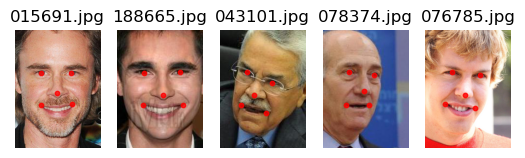

In [ ]:
check_landmarks(5)

## Архитектура Stacked Hourglass Network

В разных вариантах пайплайна для распознавания лиц ключевые точки лица могут предсказываться сразу детектором (MTCNN, RetinaFace и прочие), а могут и отдельной моделью. В этом проекте рассматривается второй вариант. То есть, за детекцию ключевых точек будет отвечать отдельная модель.

**Hourglass** — это U-Net-подобная структура, которая сначала уменьшает разрешение изображения, затем восстанавливает его обратно. Такая структура напоминает по форме песочные часы (hourglass).

**Stacked Hourglass Network** состоит Hourglass-блоков, каждый из которых старается уточнять результат предыдущего. Несмотря на то, что она придумана в 2016 году, до сих пор используется во многих исследовательских проектах для задачи обнаружения ключевых точек.

![image](https://img2018.cnblogs.com/blog/900393/201907/900393-20190722093153502-1808128161.png)

### Hourglass module

Посмотрим подробнее на структуру **отдельного Hourglass-блока**

![retrt](https://curt-park.github.io/images/stacked_hourglass_networks/fig3.png)

Каждый бокс в этой схеме - это Residual block, который отвечает за извлечение признаков на разных уровнях детализации (вспоминаем про ResNet). Причем, каждый такой блок имеет одинаковую размерность на входе и на выходе.

Downsampling и upsampling можно делать разными способами.

*   Для Downsampling: nn.MaxPool2d или nn.Conv2d
*   Для Upsampling: nn.Upsample или nn.ConvTranspose2d

Основная разница: maxpool и upsample - необучаемые слои в отличие от сверток. Это может как быть как минусом, так и плюсом: чем больше параметров - тем медленее идет процесс обучения (при этом не факт, что результаты будут лучше).

То есть, идейно все практически также как было в U-net: полностью симметричная архитектура, сначала идет преобразование в более низкоразмерное пространство, а потом декодирование обратно с пробросами результатов из соотвествующих слоев энкодера. Разница лишь в том, что теперь каждый кирпичик - это Residual block.

А вот реализация ResidualBlock вам в помощь!

Но можете ее править под себя, если очень хочется.

In [ ]:
from torch import nn

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.skip = nn.Identity() if in_channels == out_channels else nn.Conv2d(in_channels, out_channels, 1)

        self.conv1 = nn.Conv2d(in_channels, out_channels // 2, 1)
        self.bn1 = nn.BatchNorm2d(out_channels // 2)
        self.conv2 = nn.Conv2d(out_channels // 2, out_channels // 2, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels // 2)
        self.conv3 = nn.Conv2d(out_channels // 2, out_channels, 1)
        self.bn3 = nn.BatchNorm2d(out_channels)

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = self.skip(x)
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.bn3(self.conv3(x))
        return self.relu(x + residual)

При построении архитектуры Hourglass-блоков **не обязательно полностью повторять архитектуру**, которая представлена на картинке из статьи. Вы можете добавлять больше или меньше модулей, некоторые блоки вообще можно не использовать. В целом, это творческая задача и вы вольны делать так, как вам самим хочется. **Главное - чтобы ваша реализация соотвествовала изначальной идее Hourglass, и итоговые результаты были достаточно хорошими.**

### Stacked Hourglass Network

Как и было сказано ранее, Stacked Hourglass - это набор одинаковых Hourglass блоков (см. схематический рисунок в начале ноутбука). Но что это за блок между каждыми двумя Hourglass? Чтобы ответить на этот вопрос, нужно сначала разобраться с тем, что мы будем получать на выходе такой нейронной сети.

Предсказывать ключевые точки лица можно поразному. Есть два основных подхода:

1.   Регрессия - предсказывает координаты точек лица напрямую -> $(N, x, y)$.
2.   Heatmap - предсказывает карту вероятностей на выходе, а наиболее подходящие точки находятся через argmax

Не вдваясь в подробности, можно просто сказать, что Heatmap-подход показал себя лучше из-за своей устойчивости к шумам и начальным условиям. В качестве функции потерь в таком случае используют обычный **MSE loss**.

В Stacked Hourglass **используется именно heatmap-подход**. И на выходе каждого Hourglass-блока находится слой (голова), который создает heatmap нужного размера. Обычно это какие-то стандартные варианты по типу *Conv -> BatchNorm -> Relu -> Conv* или просто *Conv*. Каждая heatmap'a прокидывается на следующую голову, и они суммируются, и так, пока слои не закончатся.

Такой подход нужен для реализации **Intermediate Supervision**. Если говорить простыми словами, то это такой вариант обучения нейронной сети, когда мы подсчитываем лосс не только по финальному выходу сети, а также на некоторых промежуточных слоях (головах). Градиенты в этом случае тоже распространяются не только через последний выход, но и через промежуточные уровни. Эти головы не влияют на финальное предсказание напрямую, но помогают модели быстрее и лучше учиться. На практике это означет следующее:

Нужно посчитать лосс (таргет для всех одинаковый) для каждой головы отдельно, а потом просуммировать. Далее Pytorch сам построит за вас весь граф вычислений и правильно запустит везде градиенты. В коде это выглядит так:

```
outputs = model(image)  # outputs — список из N heatmaps от разных голов
losses = [loss_function(output, target) for output in outputs]
total_loss = sum(losses)
total_loss.backward()
optimizer.step()
```

Подведем **итоги по архитектуре**.

Stacked Hourglass состоит из Hourglass-блоков, после каждого такого блока идет голова, которая предсказывает heatmap'у. Каждая heatmap'а суммируется с предыдущей. Градиенты при обучении текут с каждой головы, а не только через последний выход сети.

Подробно про Stacked Hourglass Network можно прочитать в [оригинальной статье](https://arxiv.org/pdf/1603.06937).

## Подготовка датасета для обучения

На этом этапе у вас уже должен быть готовый датасет на основе CelebA In A Wild.

В разметке CelebA всего 5 точек:

1.   Левый глаз
2.   Правый глаз
3.   Нос
4.   Левый уголок рта
5.   Правый уголок рта


Единственная проблема заключается в том, что разметка - это именно точки, а не heatmap'ы. Но можно их сгенерировать самостоятельно при помощи гауссовского распределения вокруг размеченных точек. Вот вам функции в помощь. Можете их тоже редактивовать под себя, если нужно.

In [ ]:
import numpy as np

def create_heatmap(size, landmark, sigma=2):
    """
    Создаёт один heatmap с гауссовым ядром вокруг точки.

    :param size: (height, width) — размер heatmap'а
    :param landmark:(x, y) — координаты точки
    :param sigma
    :return: heatmap массив
    """
    x, y = landmark
    h, w = size

    # Обрезаем координаты, чтобы не выйти за пределы изображения
    x = min(max(0, int(x)), w - 1)
    y = min(max(0, int(y)), h - 1)

    xx, yy = np.meshgrid(np.arange(w), np.arange(h))
    heatmap = np.exp(-((yy - y)**2 + (xx - x)**2) / (2 * sigma**2))
    return heatmap


def landmarks_to_heatmaps(image_shape, landmarks, sigma=2):
    """
    Преобразует список из N точек в набор из N heatmap'ов.

    :param image_shape: исходный размер изображения (H, W)
    :param landmarks: список из N пар координат [(x1, y1), (x2, y2), ..., (xN, yN),]
    :param sigma:
    :return: массив heatmap'ов вида [N, H, W]
    """
    heatmaps = []

    for (x, y) in landmarks:
        hm = create_heatmap(image_shape, landmark=(x,y), sigma=sigma)
        heatmaps.append(hm)

    return np.array(heatmaps)

## Выравнивание по предсказанным точкам

Существует множество вариантов, как по полученным точкам правильно преобразовать картинку. Главное, что вам нужно понимать - **это задача классического компьютерного зрения** и решается при помощи математики, без нейронок. Вдаваться в подробности конкретных алгоритмов мы не будем.

Можно использовать аффинное преобразование, тогда потребуется только 3 точки, можно, например, искать матрицу гомографии, где может быть использовано больше точек, а может быть, есть еще что-то. Реализовывать эти алгоритмы самим не нужно. Достаточно провести небольшой ресерч и найти готовое решение (но **не готовую нейронку для выравнивания**), лишь бы оно работало. Количество используемых точек тоже выбирайте сами, подойдет любой вариант. Условный ориентир для поиска - библиотека **opencv**. Обязательно приведите примеры того, как работает ваш алгоритм.

# План заданий

По итогу, в этом блоке у вас следующие задачи:

*   Подготовить датасет, сохранить файл с оригинальными названиями изображений
*   Реализовать Hourglass блок
*   Реализовать Stacked Hourglass
*   Преобразовать точки лица в Heatmap'ы
*   Обучить Stacked Hourglass
*   Найти функцию, которая по предсказанным ключевым точкам выравнивает лица на картинке (face alignment)
*   Подготовить датасет с кропнутыми и выровненными лицами для следующего этапа

**P.S. Не забывайте сохранять модели после обучения и выводите промежуточные результаты на экран**



**Удачи! У вас всё получится 💗!**



> ***Спасибо)***



# **Реализация Stacked Hourglass Network**

In [ ]:
import torch
# Assuming ResidualBlock is defined in a previous cell as provided in the notebook context
# If not, it would need to be included here or imported.

class HourglassModule(nn.Module):
    def __init__(self, depth, in_channels, out_channels):
        super().__init__()
        self.depth = depth # Глубина текущего Hourglass модуля (количество рекурсивных вложений)
        self.in_channels = in_channels # Количество входных каналов
        self.out_channels = out_channels # Количество выходных каналов

        # 1. Начальный ResidualBlock:
        # Принимает входные признаки и преобразует их. Его выход будет использован для skip-connection.
        self.res1 = ResidualBlock(in_channels, out_channels)

        # 2. Слой Downsampling:
        # Уменьшает пространственное разрешение признаков в 2 раза. Это начало "сжимающей" частиhourglass-модуля.
        self.downsample = nn.MaxPool2d(kernel_size=2)

        # 3. ResidualBlock после Downsampling:
        # Обрабатывает признаки после уменьшения разрешения.
        self.res2 = ResidualBlock(out_channels, out_channels)

        # 4. Рекурсивная часть или базовый случай:
        # Если глубина > 1, то внутри этого Hourglass модуля находится еще один Hourglass модуль (рекурсия).
        # Это формирует вложенную структуру "песочных часов".
        # Если глубина = 1 (базовый случай), то используется обычный ResidualBlock на дне архитектуры.
        if depth > 1:
            self.recursive_hg = HourglassModule(depth - 1, out_channels, out_channels)
        else:
            self.bottom_res = ResidualBlock(out_channels, out_channels)

        # 5. Слой Upsampling:
        # Увеличивает пространственное разрешение признаков обратно в 2 раза, восстанавливая их размер.
        # Используется mode='nearest' для простого увеличения (без обучения параметров).
        self.upsample = nn.Upsample(scale_factor=2, mode='nearest')

        # 6. Финальный ResidualBlock:
        # Обрабатывает объединенные признаки после upsampling и skip-connection.
        self.res3 = ResidualBlock(out_channels, out_channels)

    def forward(self, x):
        # 1. Проход через первый ResidualBlock:
        # `skip_connection` сохраняет признаки до downsampling, чтобы позже объединить их с upsampled-признаками (как в U-Net).
        skip_connection = self.res1(x)

        # 2. Downsample:
        # Уменьшаем пространственное разрешение признаков.
        down = self.downsample(skip_connection)

        # 3. Проход через второй ResidualBlock:
        # Обрабатываем признаки после downsample.
        down_res = self.res2(down)

        # 4. Рекурсивный вызов или базовый ResidualBlock:
        # Если `depth > 1`, вызываем вложенный HourglassModule. Это углубляет сеть.
        # Если `depth = 1`, это самый глубокий уровень, и мы просто используем `bottom_res`.
        if self.depth > 1:
            bottom_out = self.recursive_hg(down_res)
        else:
            bottom_out = self.bottom_res(down_res)

        # 5. Upsample:
        # Увеличиваем пространственное разрешение признаков обратно.
        up = self.upsample(bottom_out)

        # 6. Объединение признаков:
        # Здесь происходит ключевое объединение признаков: upsampled-признаки суммируются
        # с признаками из `skip_connection`. Это помогает модели сохранять детали, потерянные
        # при downsampling, и обеспечивает контекст из разных уровней разрешения.
        # Пространственные размеры `up` и `skip_connection` должны совпадать после MaxPool2d и Upsample(scale_factor=2).
        combined_features = up + skip_connection

        # 7. Финальный ResidualBlock:
        # Последняя обработка объединенных признаков перед выходом из текущего Hourglass модуля.
        output = self.res3(combined_features)

        return output

In [ ]:
class HourglassHead(nn.Module):
    def __init__(self, in_channels, num_landmarks):
        super().__init__()
        # A single convolutional layer to produce a heatmap for each landmark
        # kernel_size=1 is typical for a 1x1 convolution, acting as a channel mixer/selector
        self.conv = nn.Conv2d(in_channels, num_landmarks, kernel_size=1)

    def forward(self, x):
        # Pass the input through the convolutional layer to get the heatmaps
        return self.conv(x)

In [ ]:
class StackedHourglassNetwork(nn.Module):
    def __init__(self, num_stacks, depth, in_channels, out_channels, num_landmarks):
        super().__init__()
        self.num_stacks = num_stacks
        self.num_landmarks = num_landmarks

        self.preprocess = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            ResidualBlock(64, 128),
            nn.MaxPool2d(kernel_size=2),
            ResidualBlock(128, in_channels)

        )

        self.hourglass_modules = nn.ModuleList([
            HourglassModule(depth, in_channels, out_channels) for _ in range(num_stacks)
        ])

        self.heads = nn.ModuleList([
            HourglassHead(out_channels, num_landmarks) for _ in range(num_stacks)
        ])

        # Intermediate layers for intermediate supervision
        self.intermediate_convs_features = nn.ModuleList()
        self.intermediate_convs_heatmaps = nn.ModuleList()

        for i in range(num_stacks - 1):
            self.intermediate_convs_features.append(nn.Conv2d(out_channels, in_channels, kernel_size=1))
            self.intermediate_convs_heatmaps.append(nn.Conv2d(num_landmarks, in_channels, kernel_size=1))

    def forward(self, x):
        # Initial processing
        x = self.preprocess(x)

        outputs = []
        for i in range(self.num_stacks):
            # Forward through current Hourglass module
            hg_out = self.hourglass_modules[i](x)

            # Predict heatmaps
            heatmap_out = self.heads[i](hg_out)
            outputs.append(heatmap_out)

            # For intermediate stacks, prepare input for the next stack
            if i < self.num_stacks - 1:
                # Convert heatmap to features
                heatmap_to_features = self.intermediate_convs_heatmaps[i](heatmap_out)
                # Convert HG output to features
                hg_out_to_features = self.intermediate_convs_features[i](hg_out)
                # Sum features to pass to the next stack
                x = x + hg_out_to_features + heatmap_to_features

        return outputs

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import numpy as np
import torch

class FaceLandmarksDataset(Dataset):
    def __init__(self, df, images_path, target_image_size=(128, 128), transform=None):
        self.df = df
        self.images_path = images_path
        self.target_image_size = target_image_size # New fixed size

        if transform is None:
            self.transform = transforms.Compose([
                transforms.Resize(target_image_size), # Resize images to a fixed size
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])
        else:
            # Ensure resizing is part of any custom transform. If a custom transform is provided
            # it's assumed to handle resizing or user will add it. For now, default to adding it.
            self.transform = transforms.Compose([
                transforms.Resize(target_image_size),
                transform
            ])

    def __len__(self):
        return len(self.df)

    def _get_image(self, image_id):
        image_full_path = os.path.join(self.images_path, image_id)
        try:
            image = Image.open(image_full_path).convert('RGB')
            return image
        except FileNotFoundError:
            print(f'Путь не найден. Возможно файла "{image_id}" не существует. Пропускаем изображение.')
            return None

    def _get_landmarks(self, row, adjusted=False):
        original_landmarks_abs = [
            (row['lefteye_x'], row['lefteye_y']),
            (row['righteye_x'], row['righteye_y']),
            (row['nose_x'], row['nose_y']),
            (row['leftmouth_x'], row['leftmouth_y']),
            (row['rightmouth_x'], row['rightmouth_y'])
        ]
        if adjusted:
            x1_orig, y1_orig = row['x_1'], row['y_1']
            original_bbox_width, original_bbox_height = row['width'], row['height']

            # Handle cases where width or height might be zero to avoid division by zero
            if original_bbox_width == 0 or original_bbox_height == 0:
                print(f"Warning: Bounding box for {row['image_id']} has zero width or height. Skipping landmark adjustment.")
                return [(0,0)] * len(original_landmarks_abs) # Return dummy landmarks or handle as error

            scale_x = self.target_image_size[1] / original_bbox_width
            scale_y = self.target_image_size[0] / original_bbox_height

            adjusted_landmarks = []
            for lx_orig_abs, ly_orig_abs in original_landmarks_abs:
                # Landmarks relative to the *cropped* image's original top-left corner
                lx_relative_to_crop = lx_orig_abs - x1_orig
                ly_relative_to_crop = ly_orig_abs - y1_orig

                # Scale landmarks to the new fixed image dimensions
                lx_scaled = lx_relative_to_crop * scale_x
                ly_scaled = ly_relative_to_crop * scale_y
                adjusted_landmarks.append((int(round(lx_scaled)), int(round(ly_scaled))))
            return adjusted_landmarks
        else:
            return original_landmarks_abs

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_id = row['image_id']

        image = self._get_image(image_id)
        if image is None:
            return None # Skip this sample if image loading fails

        adjusted_landmarks = self._get_landmarks(row, adjusted=True)
        # Ensure landmarks are valid (e.g., not all (0,0) from an error case)
        if not adjusted_landmarks or all(lm == (0,0) for lm in adjusted_landmarks): # Check if list is empty or contains problematic values
            print(f"Warning: Skipping {image_id} due to invalid landmarks.")
            return None

        # Apply image transform
        transformed_image = self.transform(image)

        # Determine heatmap size from transformed image (C, H, W) -> (H, W)
        # The heatmaps will have the same spatial dimensions as the transformed image
        heatmap_image_shape = transformed_image.shape[1:] # (H, W)

        # Generate heatmaps using the global landmarks_to_heatmaps function
        heatmaps_np = landmarks_to_heatmaps(heatmap_image_shape, adjusted_landmarks)
        heatmaps_tensor = torch.from_numpy(heatmaps_np).float()

        # Convert adjusted landmarks to tensor (for direct landmark loss if needed, or plotting)
        adjusted_landmarks_tensor = torch.tensor(adjusted_landmarks).float()

        return transformed_image, heatmaps_tensor, adjusted_landmarks_tensor


#_________________________________________________________________________________


# Custom collate_fn to filter out None samples
def custom_collate_fn(batch):
    # Filter out None samples (e.g., failed image loading)
    batch = [item for item in batch if item is not None]
    if not batch:
        return None # Return None or an empty list if the batch is empty after filtering
    return torch.utils.data.dataloader.default_collate(batch)

# Instantiate the dataset
# Ensure `merged_landmarks_df` and `images_path` are available from previous cells
fixed_image_size = (128, 128) # Define a fixed size for all images
face_landmarks_dataset = FaceLandmarksDataset(merged_landmarks_df, images_path, target_image_size=fixed_image_size)

# Instantiate the DataLoader
batch_size = 32 # Define your desired batch size
dataloader = DataLoader(face_landmarks_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn, num_workers=0) # Changed num_workers to 0

print(f"FaceLandmarksDataset and DataLoader created with batch size {batch_size}. All images will be resized to {fixed_image_size}")

FaceLandmarksDataset and DataLoader created with batch size 32. All images will be resized to (128, 128)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def plot_predicted_heatmaps(model, input_image_tensor, num_landmarks, device='cuda'):
    """
    Visualizes the input image and the heatmaps predicted by the model,
    including overlaid predicted landmarks.

    :param model: The trained Stacked Hourglass Network model.
    :param input_image_tensor: A single input image tensor (C, H, W)
                                (already normalized).
    :param num_landmarks: The number of landmarks the model predicts.
    :param device: The device the model is on (e.g., 'cuda' or 'cpu').
    """
    model.eval() # Set model to evaluation mode

    # Add batch dimension and move to device
    image_batch = input_image_tensor.unsqueeze(0).to(device) # Shape: [1, C, H, W]

    with torch.no_grad():
        # Get model predictions. outputs is a list of heatmaps from each stack.
        # We take the last one as it's the most refined.
        output_heatmaps_list = model(image_batch)
        # Get the last heatmap prediction from the list of outputs
        output_heatmaps = output_heatmaps_list[-1] # Shape: [1, num_landmarks, H_out, W_out]

    # Move heatmap predictions to CPU and convert to numpy for plotting
    output_heatmaps_np = output_heatmaps.squeeze(0).cpu().numpy() # Shape: [num_landmarks, H_out, W_out]

    # Convert heatmaps to landmark coordinates
    # heatmaps_to_landmarks expects [batch_size, num_landmarks, H, W]
    predicted_landmarks_batch = heatmaps_to_landmarks(output_heatmaps.cpu()) # Landmarks are on CPU
    predicted_landmarks = predicted_landmarks_batch.squeeze(0).numpy() # Shape: [num_landmarks, 2]

    # Denormalize image for display (assuming standard ImageNet normalization)
    # The image tensor is (C, H, W)
    mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
    std = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))

    display_image_np = input_image_tensor.cpu().numpy() * std + mean
    display_image_np = np.clip(display_image_np.transpose(1, 2, 0), 0, 1) # Convert to (H, W, C) for matplotlib

    fig = plt.figure(figsize=(num_landmarks * 3 + 3, 4)) # Adjust figure size dynamically

    # Plot the original image with predicted landmarks
    ax0 = fig.add_subplot(1, num_landmarks + 1, 1)
    ax0.imshow(display_image_np)
    ax0.set_title("Input Image with Pred. Landmarks")
    ax0.axis('off')

    # The input_image_tensor has dimensions H_img, W_img.
    # The output_heatmaps have dimensions H_hm, W_hm (after the preprocess layers).
    H_img, W_img = input_image_tensor.shape[1:]
    H_hm, W_hm = output_heatmaps.shape[2:]

    # Scale landmarks from heatmap coordinates back to original image coordinates for display
    scale_x = W_img / W_hm
    scale_y = H_img / H_hm

    scaled_predicted_landmarks = predicted_landmarks * np.array([scale_x, scale_y])

    ax0.scatter(scaled_predicted_landmarks[:, 0], scaled_predicted_landmarks[:, 1],
                c='red', s=20, marker='o', alpha=0.7, label='Predicted')

    # Plot each heatmap
    for i in range(num_landmarks):
        ax = fig.add_subplot(1, num_landmarks + 1, i + 2) # +2 because 1st subplot is image
        ax.imshow(output_heatmaps_np[i], cmap='jet')
        ax.set_title(f"Landmark {i+1} Heatmap")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
import torch.optim as optim
from tqdm.auto import tqdm
import torch.nn.functional as F

def train_model(model, dataloader, num_epochs, device, learning_rate=1e-4, display_frequency=10):
    """
    Orchestrates the training process for the Stacked Hourglass Network.

    :param model: The Stacked Hourglass Network model.
    :param dataloader: DataLoader for the training dataset.
    :param num_epochs: Number of epochs to train for.
    :param device: Device to run the model on (e.g., 'cuda' or 'cpu').
    :param learning_rate: Learning rate for the optimizer.
    :param display_frequency: How often (in epochs) to display sample predictions.
    :return: A list of average epoch losses.
    """
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss() # MSE loss for heatmap prediction

    loss_history = []

    for epoch in range(num_epochs):
        model.train() # Set model to training mode
        running_loss = 0.0
        for batch_idx, batch_data in enumerate(tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")):
            if batch_data is None: # Skip if custom collate_fn returned None
                continue

            images, true_heatmaps, _ = batch_data # We don't need adjusted_landmarks_tensor for loss, but it's returned
            images = images.to(device)
            true_heatmaps = true_heatmaps.to(device) # Shape: [batch_size, num_landmarks, H, W]

            optimizer.zero_grad()

            outputs = model(images) # Outputs is a list of heatmaps from each stack

            # Calculate loss for each heatmap output (intermediate supervision)
            total_batch_loss = 0.0
            for output_heatmap in outputs:
                # Resize true_heatmaps to match output_heatmap's spatial dimensions
                # This is crucial because the model's output feature map size is reduced by the preprocessing steps
                target_heatmap_size = output_heatmap.shape[2:] # Get (H, W) from the model's output
                resized_true_heatmaps = F.interpolate(true_heatmaps, size=target_heatmap_size, mode='bilinear', align_corners=False)
                total_batch_loss += criterion(output_heatmap, resized_true_heatmaps)

            total_batch_loss.backward()
            optimizer.step()

            running_loss += total_batch_loss.item()

        avg_epoch_loss = running_loss / len(dataloader)
        loss_history.append(avg_epoch_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_epoch_loss:.4f}")

        # Display sample predictions periodically
        if (epoch + 1) % display_frequency == 0 or epoch == num_epochs - 1:
            print(f"Plotting predicted heatmaps for Epoch {epoch+1}...")
            # Get a single sample for visualization
            model.eval() # Temporarily set to eval mode for inference
            try:
                sample_batch = next(iter(dataloader)) # Get the first batch for visualization
            except StopIteration:
                # If dataloader is exhausted, re-initialize iterator
                dataloader_iterator = iter(dataloader)
                sample_batch = next(dataloader_iterator)

            sample_image_tensor = sample_batch[0][0].cpu() # Take the first image from the batch, move to CPU
            # Assuming true_heatmaps are present in sample_batch[1], get num_landmarks from its shape
            num_landmarks = sample_batch[1].shape[1]

            plot_predicted_heatmaps(model, sample_image_tensor, num_landmarks=num_landmarks)
            model.train() # Set model back to train mode after plotting

    print("Training complete!")
    return loss_history

Using device: cuda
Starting model training...


Epoch 1/10:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1/10, Loss: 24607.7088
Plotting predicted heatmaps for Epoch 1...


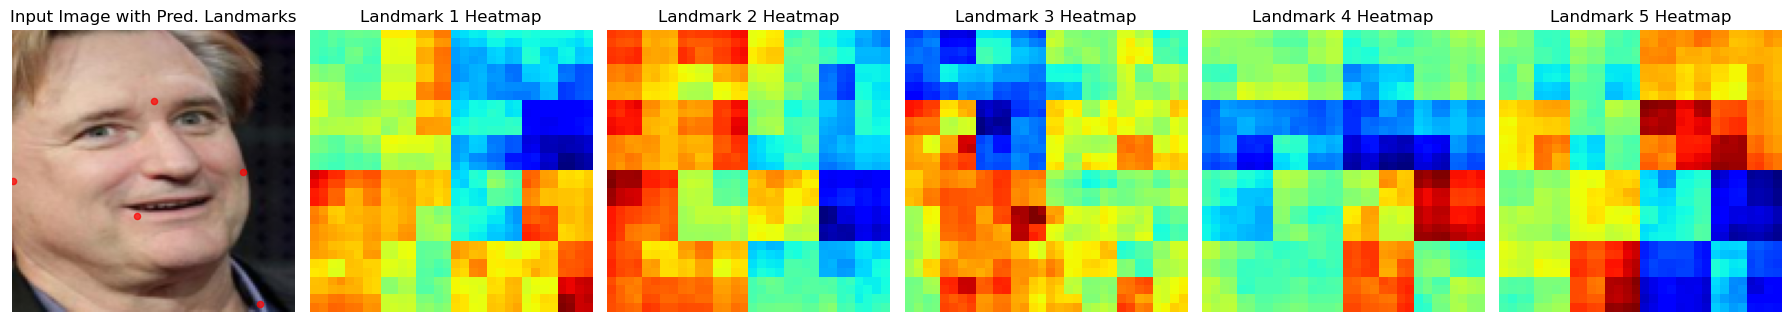

Epoch 2/10:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 2/10, Loss: 1102.1328
Plotting predicted heatmaps for Epoch 2...


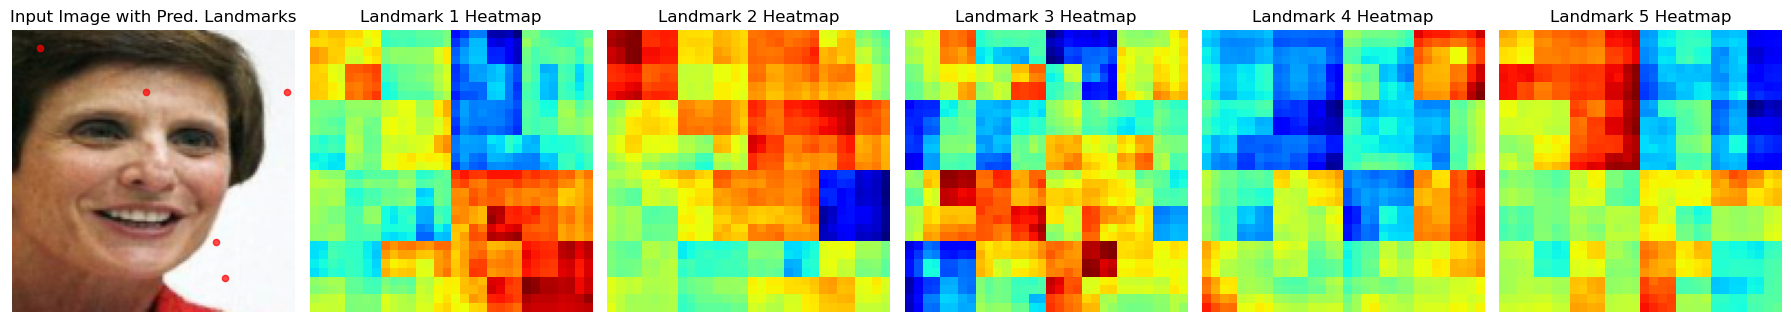

Epoch 3/10:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 3/10, Loss: 599.1539
Plotting predicted heatmaps for Epoch 3...


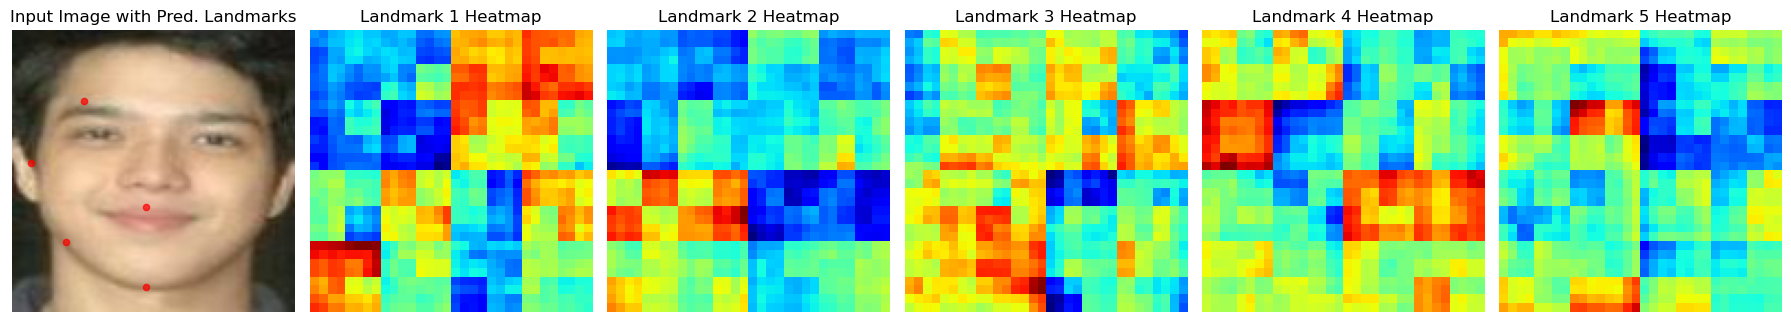

Epoch 4/10:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 4/10, Loss: 415.1891
Plotting predicted heatmaps for Epoch 4...


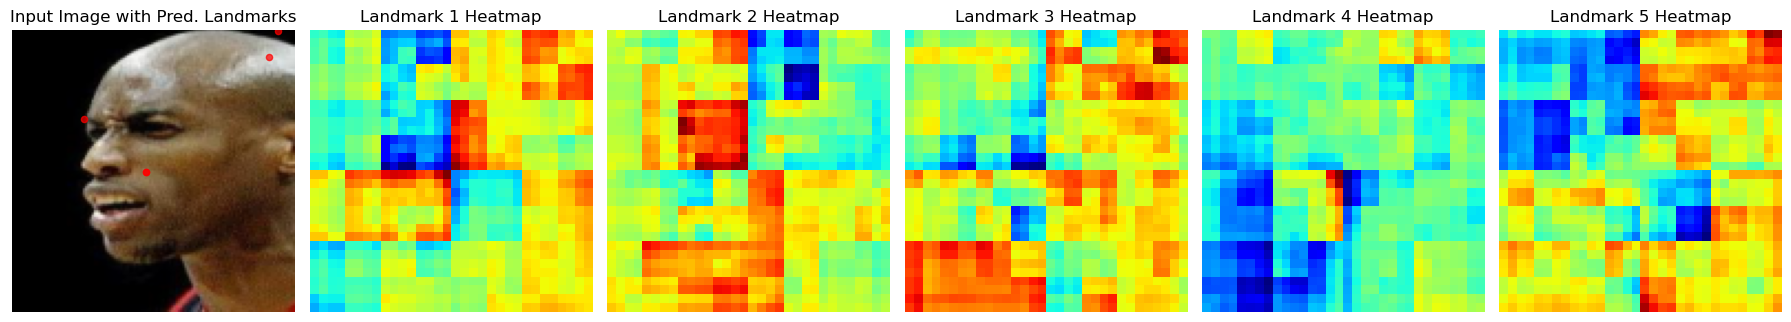

Epoch 5/10:   0%|          | 0/469 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}") # Added back print statement

# Model parameters
num_stacks = 5        # Number of Hourglass modules
depth = 5             # Depth of each Hourglass module (recursive calls)
in_channels = 256     # Input channels for Hourglass module after preprocessing
out_channels = 256    # Output channels for Hourglass module
num_landmarks = 5     # Number of facial landmarks (5 for CelebA)

# Initialize the model
model = StackedHourglassNetwork(num_stacks, depth, in_channels, out_channels, num_landmarks).to(device)

# Training parameters
num_epochs = 10
display_frequency = 1 # Display sample predictions every N epochs

print("Starting model training...")

# Start training and store loss history
loss_history = train_model(model, dataloader, num_epochs, device, learning_rate=1e-4, display_frequency=display_frequency)

print("Model training finished.")
print("Loss History:", loss_history)